### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) = 0
$$

Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

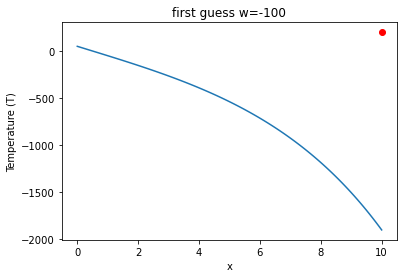

In [2]:
#constant
T_0 = 20
alpha = 5 * 10**-2

T0 = 50
w0 = -100

xf = 10
Tf = 200

y_init = [T0, w0]

def rhs(T, x):
    return [T[1], -alpha*(T_0-T[0])]

x = np.linspace(0, 10, 100)
# y = odeint(rhs, y_init, t)

def plot_graph(title, T, x, Tf, xf):
    # plot the solution
    plt.plot(x, T[:, 0])
    # plot the boundary at t_final
    plt.plot(xf, Tf, 'ro')
    plt.xlabel('x')
    plt.ylabel('Temperature (T)')
    plt.title(title)
    plt.show()
    
plot_graph(f'first guess w={w0}', odeint(rhs, [T0, w0], x), x, Tf, xf)

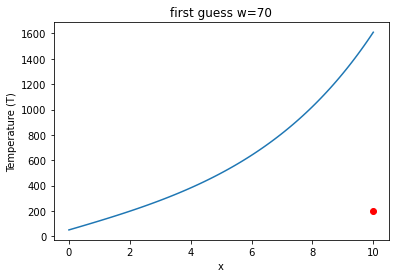

In [3]:
w0 = 70
plot_graph(f'first guess w={w0}', odeint(rhs, [T0, w0], x), x, Tf, xf)

f(a)= -2106.321314743106
f(b)= 1409.7402418982126
Optimized speed using shooting method is w=1.8396902901357746


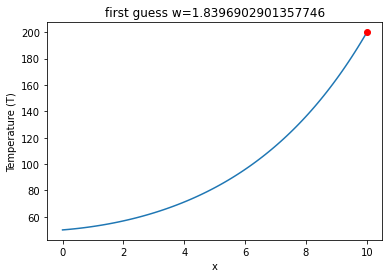

In [4]:
from scipy.optimize import brentq

def objective_func(w0):
    sol = odeint(rhs, [T0, w0], x)
    y_final = sol[-1, 0]
    return y_final - Tf

print('f(a)=', objective_func(-100))
print('f(b)=', objective_func(70))

w0 = brentq(objective_func, -100, 70)
print(f'Optimized speed using shooting method is w={w0}')
plot_graph(f'first guess w={w0}', odeint(rhs, [T0, w0], x), x, Tf, xf)

___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method

Since the time interval is $[0, 10]$ and we have $n=1000$

$$ T_0 = 50$$

$$ y_{i-1} - 2y_i + y_{i+1} = -\alpha (T_0 - T_i)h^2, \;i = 1, 2, ..., n-1$$

$$ T_{10} = 200$$

$$\begin{bmatrix}
1 & 0 & & & \\
1 & (-2 -\alpha h^2) & 1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & 1& (-2 -\alpha h^2) & 1 \\
 & & & &1
\end{bmatrix}\left[\begin{array}{c} y_0 \\y_1 \\ ... \\ y_{n-1}\\y_n \end{array}\right] =
\left[\begin{array}{c} 50 \\-\alpha (T_0)h^2 \\ ... \\ -\alpha (T_0)h^2 \\200\end{array}\right]$$

[[ 1.        0.        0.       ...  0.        0.        0.      ]
 [ 1.       -2.000005  1.       ...  0.        0.        0.      ]
 [ 0.        1.       -2.000005 ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ... -2.000005  1.        0.      ]
 [ 0.        0.        0.       ...  1.       -2.000005  1.      ]
 [ 0.        0.        0.       ...  0.        0.        1.      ]]
[ 5.e+01 -1.e-04 -1.e-04 ... -1.e-04 -1.e-04  2.e+02]


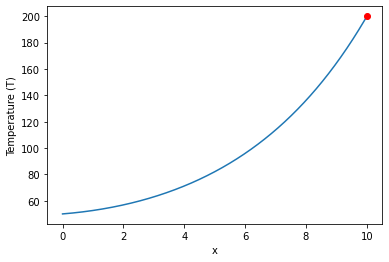

In [8]:
n = 1000
h = (10-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2 - alpha*h**2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[0] = 50
b[1:-1] = -alpha*(T_0)*h**2
b[-1] = Tf
print(b)

# solve the linear equations A x = b
T = np.linalg.solve(A, b)

x = np.linspace(0, 10, n + 1)

plt.plot(x, T)
plt.plot(xf, Tf, 'ro')
plt.xlabel('x')
plt.ylabel('Temperature (T)')
plt.show()